# Iris Flower Classification

Due to use of jypyter notebook on web installing libraries using piplite 

In [56]:
import piplite
await piplite.install(['seaborn'])

In [57]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Dataset is intalled as 'Iris.csv'</h3>

In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



<p>Get the overview of the entire data using '.describe( )' </p>

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



<p>Dropping the column named 'Id' as it holds no importance in our calculations</p>

In [8]:
df.drop('Id',axis=1,inplace=True)


We have 150 rows and 5 columns now

In [80]:
df.shape

(150, 5)

<h3>Null data handling</h3>

In [13]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can see there is no null entery so we don't need to replace or drop them.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [18]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

All the numerical data types are in float64 datatype so no need to change them 

### Visualization of the data and finding their co-relations

In [85]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


As we can see there are the types of Species and all are equal in numbers

<AxesSubplot:xlabel='Species', ylabel='count'>

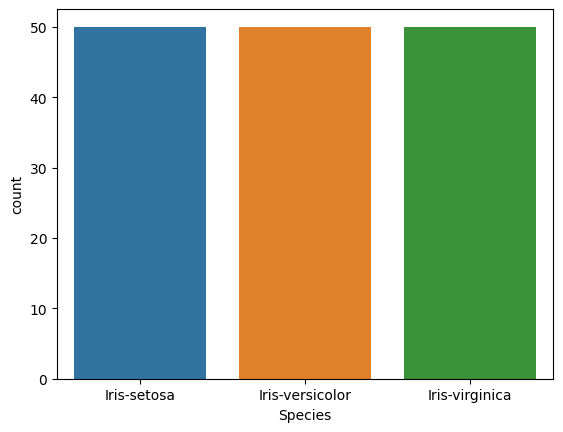

In [73]:
sns.countplot(x='Species',data=df)

 Comparing individual properties with the Target to check if they have any linearity.


<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

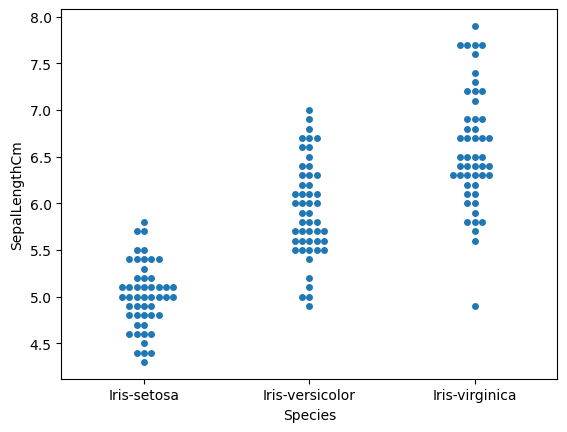

In [103]:
sns.swarmplot(x='Species', y='SepalLengthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

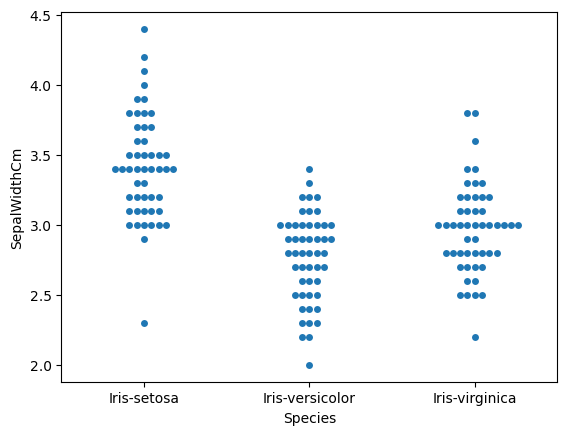

In [95]:
sns.swarmplot(x='Species', y='SepalWidthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

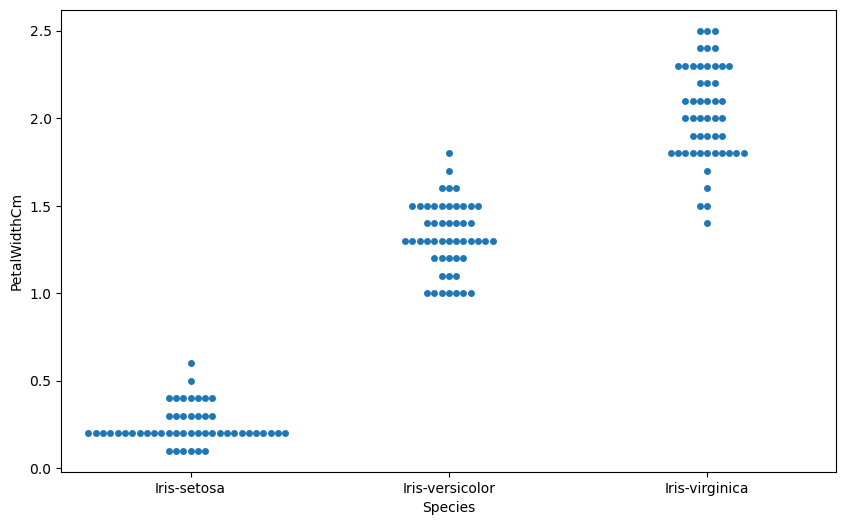

In [108]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Species', y='PetalWidthCm', data=df)


This heatmap have the co-relations of the properties of entire dataframe

Lighter the color, least they are corelated 

<AxesSubplot:>

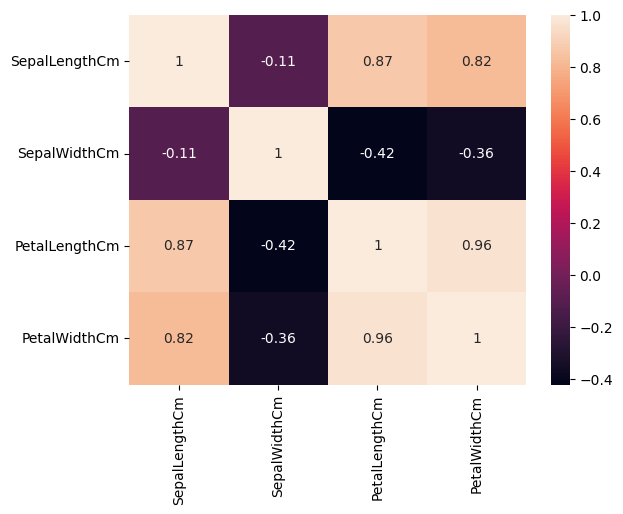

In [107]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Data spliting 

In [27]:
from sklearn.model_selection import train_test_split

In [81]:
X=df.drop('Species',axis=1).values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

The X variable contains the the data of the independent varibles or columns of the dataframe

In [82]:
Y=df['Species']
Y[:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

The Y variable contains the target data which has to be predicted

#### Converting the data into training and testing format 

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

The training data set is used to train the model and testing dataset will be used for testing our models output.


test_size is the size of the test dataset with will be reduced from the training data. (Here 20%)

In [29]:
print(f"Shape of x_train = {x_train.shape}")
print(f"Shape of y_train = {x_test.shape}")
print(f"Shape of x_test = {x_test.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of x_train = (120, 4)
Shape of y_train = (30, 4)
Shape of x_test = (30, 4)
Shape of y_test = (30,)


### Model building

sklean is the most popular python library which is used to train and test the data  

In [31]:
from sklearn.neighbors import KNeighborsClassifier

We will use the KNeighbouesClassifier to predict the data as our target 'Species' is not continuous but descrete.

In [33]:
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [34]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
ypred=knn.predict(x_test)

Lets check the samples of our predicted data and the testing data

In [39]:
print(f"Testing values : {y_test[:4]}")
print(f"Predicted values : {ypred[:4]}")

Testing values : 114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
Name: Species, dtype: object
Predicted values : ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


As we can see our model has predict almost all the correct Species

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print(f"Accuracy score : {accuracy_score(y_test,ypred)}")

Accuracy score : 0.9666666666666667


An accuracy score of 0.96 (96%) is generally considered quite high and is often indicative of a well-performing classification model.